In [285]:
import pandas as pd
import numpy as np

### Handling null values

In [286]:
df = pd.read_csv("/Users/satwikbiswas/Documents/Python/Data/Walmart.csv")
df.head()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,3/31/2024 21:46,3,"Miami, FL",...,Silver,Credit Card,True,NaN,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,7/28/2024 12:45,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,6/10/2024 4:55,1,"Los Angeles, CA",...,Platinum,Cash,False,NaN,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,8/15/2024 1:03,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,9/13/2024 0:45,6,"Chicago, IL",...,Bronze,Digital Wallet,False,NaN,Sunny,False,Thursday,True,287,469


In [287]:
df.isnull().sum()

transaction_id               0
customer_id                  0
product_id                   0
product_name                 0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
reorder_point                0
reorder_quantity             0
supplier_id                  0
supplier_lead_time           0
customer_age                 0
customer_gender              0
customer_income              0
customer_loyalty_level       0
payment_method               0
promotion_applied            0
promotion_type            3407
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
dtype: int64

In [288]:
## we can remove the all the row having null value
print(df.shape)
print(df.dropna().shape) ## but the amount of data loss is very high

## we can also remove the attributes having too much missing values

(5000, 28)
(1593, 28)


In [289]:
##value imputation

import matplotlib.pyplot as plt
import seaborn as sb

In [290]:
df = pd.read_csv("data.csv")
df.isnull().sum()

Date        0
Category    0
Value       3
Product     0
Sales       9
Region      0
dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

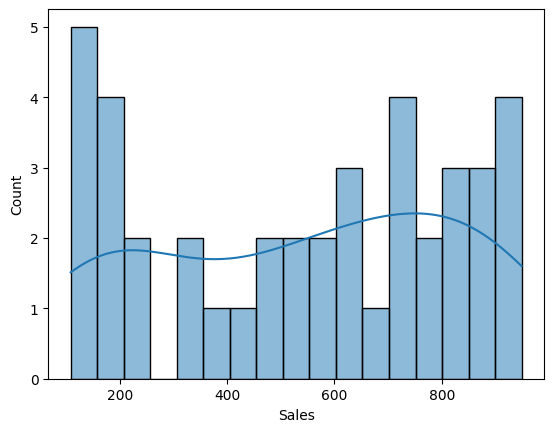

In [291]:
sb.histplot(df["Sales"],kde="True",binwidth=50)

1. this is a histogram which represent the count of observation in each bin the bin size can be changed
2. and the smooth line is the kde plot which basically porvide the pdf(likely hood of a random variabe) of the given data
3. pdf is not influenced by the hist if represent the density of that random variable

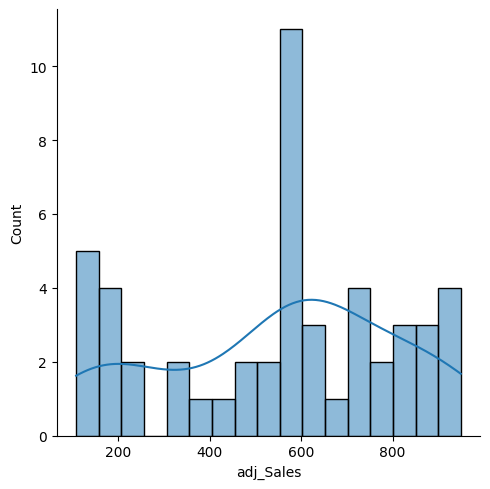

In [292]:
df["adj_Sales"] = df["Sales"].fillna(df["Sales"].median())  ## works better when there are outliers
sb.displot(df["adj_Sales"],kde="True",binwidth=50)

if the null value if due to (CMAR) then we can just fill them with some random value(mode can also be considered ) from the filled values

### Handling imbalance dataset

In [293]:
np.random.seed(10)
n_samples = 1000
ratio_0 = 0.1

n_0 = int(ratio_0*n_samples)
n_1 = int((1-ratio_0)*n_samples)

In [294]:
df1 = pd.DataFrame({
        "fet1":np.random.normal(loc=0,scale=1,size=n_1), #is a function in NumPy that generates random samples from a normal (Gaussian) distribution
        "fet2":np.random.normal(loc=0,scale=1,size=n_1),
        "target":[1]*n_1
    }
)
df2 = pd.DataFrame({
        "fet1":np.random.normal(loc=0,scale=1,size=n_0),
        "fet2":np.random.normal(loc=0,scale=1,size=n_0),
        "target":[0]*n_0
    }
)

df = pd.concat([df1,df2])

df

,fet1,fet2,target
0,1.331587,-0.465984,1
1,0.715279,0.067767,1
2,-1.545400,-0.224467,1
3,-0.008384,0.071738,1
4,0.621336,-0.116762,1
...,...,...,...
95,0.058657,0.633243,0
96,-0.954326,1.152625,0
97,0.794839,0.372233,0
98,0.709196,0.612246,0


In [295]:
df["target"].value_counts() ## here we can see that 1 is majorityclass and this can cause problem because the model created 
        ## for prediction might get baised specially in the case where is minority have high importance

target
1    900
0    100
Name: count, dtype: int64

In [296]:
## upsampling
from sklearn.utils import resample
df_mino = df[df["target"]==0]
df_majo = df[df["target"]==1]

df_upsampled_mino = resample(df_mino,replace=True,n_samples=len(df_majo),random_state=10) ## it basically copies data point from the existing df_mino and cpy them
df_upsampled_mino["target"].value_counts()

target
0    900
Name: count, dtype: int64

In [297]:
up_sampled_df = pd.concat([df_majo,df_upsampled_mino])

In [298]:
up_sampled_df["target"].value_counts()  ## upscaled the miority class and make it equall to the majority class

target
1    900
0    900
Name: count, dtype: int64

In [299]:
## down sampling
df_mino = df[df["target"]==0]
df_majo = df[df["target"]==1]

df_downsampled_majo = resample(df_majo,replace=False,n_samples=len(df_mino),random_state=10)  
df_downsampled_majo["target"].value_counts()

target
1    100
Name: count, dtype: int64

In [300]:
down_sampled_df = pd.concat([df_downsampled_majo,df_mino])

In [301]:
down_sampled_df["target"].value_counts()

target
1    100
0    100
Name: count, dtype: int64

## SMOTE(Synthetic Minority Oversampling Technique)

    SMOTE is a technique used in ML to address the problem due to unbalanced datasets where the minority class is significantly smaller than the majority class. SMOTE involves generating synthetic instance of minority class by 
    interpolating between existing instances

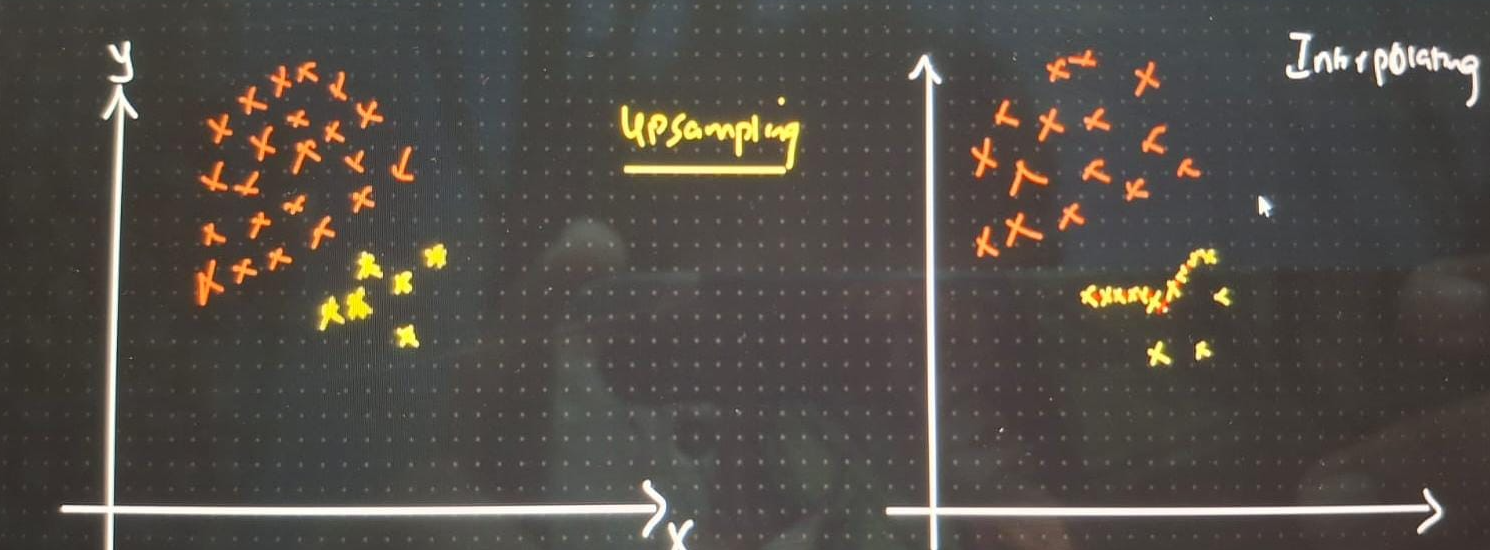

the main issue of upscaling is that we genrally generate the same set of point which does not include any varience in data but in SMOTE we synthesize our own data by interpolating two neighboiring data points thus the data in this case much more variability

In [302]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_classes=2,n_clusters_per_class=1,weights=[0.9],random_state=12)

"""
make_classification function is used to genrate/synthesize data sets
n_sample = no of point
n-feature = no of cols
n-classes = no of classes
n-cluster_per_class = no of subcluster per class
weight=[] the ratio of classes

it returns X which is a 2d matrix which include the rows and col generated and y constains the target value
"""

df1 = pd.DataFrame(X,columns=["f1","f2"])
df2 = pd.DataFrame(y,columns=["target"])

df = pd.concat([df1,df2],axis=1)
df["target"].value_counts()


target
0    900
1    100
Name: count, dtype: int64

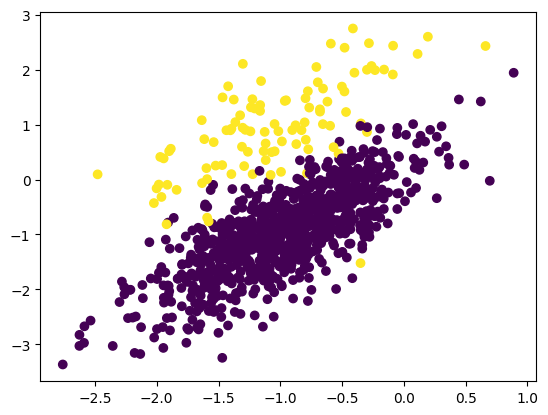

In [303]:
plt.scatter(df["f1"],df["f2"],c=df["target"])

In [304]:
from imblearn.over_sampling import SMOTE

X,y = SMOTE().fit_resample(df[["f1","f2"]],df["target"])

df_overSampled = pd.concat([pd.DataFrame(X,columns=["f1","f2"]),pd.DataFrame(y,columns=["target"])],axis=1)
df_overSampled["target"].value_counts()



target
0    900
1    900
Name: count, dtype: int64

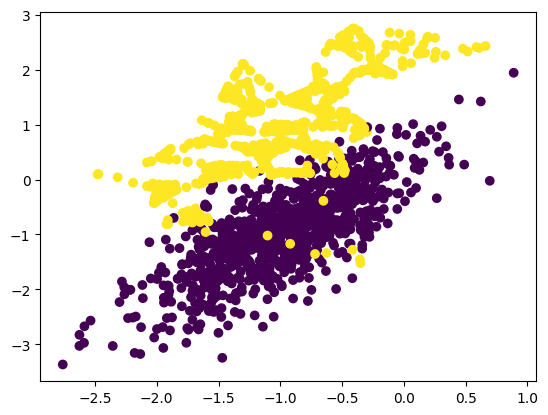

In [305]:
plt.scatter(df_overSampled["f1"],df_overSampled["f2"],c=df_overSampled["target"])

### 5 number theory

In [306]:
import random as r

np.random.seed(10)
arr = np.random.random(30)*100
arr

array([77.13206433,  2.07519494, 63.36482349, 74.88038825, 49.85070123,
       22.47966455, 19.80628648, 76.05307122, 16.91108366,  8.83398142,
       68.53598184, 95.33933462,  0.39482663, 51.21922634, 81.26209617,
       61.25260668, 72.17553174, 29.18760682, 91.77741225, 71.45757834,
       54.2544368 , 14.21700476, 37.33407601, 67.41336151, 44.18331744,
       43.40139933, 61.77669785, 51.31382426, 65.03971819, 60.10389534])

In [307]:
min,Q1,mid,Q3,max = np.quantile(arr,[0.0,0.25,0.50,0.75,1.0])
print(min,Q1,mid,Q3,max)

0.39482663279144514 31.224224114084215 57.17916607079028 70.72717921402173 95.33933461949366


### Data Encoding


converting catagorical data into numerical data which the model will understand

    1. Nominal/OHE encoding
    2. Label and ordinal encoding
    3. Target guided ordinal encoding

One-Hot-Encoding:
    
    For a catagorical feture having k unique values
    
    1. OHE creates k binary col
    2. and set 1 in  the col corrosponding to the data

    basically it returns a binary vector coorsponding to the catagorical Data

Cons:

    1. if the feature have many unique values then OHE will create multiple cols
    2. it result in sparse matrix 
    

In [328]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({
    "color":["red","green","blue","yellow"]
})
encoder = OneHotEncoder()
arr = encoder.fit_transform(df[["color"]]).toarray()

encoded_df = pd.concat([df,pd.DataFrame(arr,columns=["B","G","R","Y"])],axis=1)
print(encoded_df)

    color    B    G    R    Y
0     red  0.0  0.0  1.0  0.0
1   green  0.0  1.0  0.0  0.0
2    blue  1.0  0.0  0.0  0.0
3  yellow  0.0  0.0  0.0  1.0


Label encoder

    1. here it basically assing 0 to n-1 values to each distinct class 
    2. that assign value is used instid of catagorical data
    3. here the value assign have no priority and it is nominal

Ordinal encoder

    1. In this case the values assigne to each class have a orer or ranking 
    2. example educational level:

        school:1
        collage:2
        university:3
    here the values assign have priority

Target Guided ordinal Encoding

    1. This used in the situations where the number of unique values in the catagorical field is vary large
    2. here the catagorical data is replaced by the mean of the target varibales for that catagory

In [333]:
df = pd.DataFrame({
    "city":['San Antonio', 'Dallas', 'Phoenix', 'San Diego', 'San Antonio', 'Dallas', 'Chicago', 'San Diego', 'Chicago', 'Houston'],
    "price":[0, 4, 1, 3, 0, 4, 5, 3, 5, 2]
})

print(df)

          city  price
0  San Antonio      0
1       Dallas      4
2      Phoenix      1
3    San Diego      3
4  San Antonio      0
5       Dallas      4
6      Chicago      5
7    San Diego      3
8      Chicago      5
9      Houston      2


In [330]:
## now we want to use the city name inside our model
## so we can replace the city name with the mean of the all the prices of that perticluar city

encode_val = df.groupby("city")["price"].mean().to_dict()


In [331]:
li = []
for val in df["city"]:
    li.append(encode_val[val])
encoded_feature = pd.Series(li)
df["city_val"] = encoded_feature

In [332]:
print(df)

          city  price  city_val
0  San Antonio      0       0.0
1       Dallas      4       4.0
2      Phoenix      1       1.0
3    San Diego      3       3.0
4  San Antonio      0       0.0
5       Dallas      4       4.0
6      Chicago      5       5.0
7    San Diego      3       3.0
8      Chicago      5       5.0
9      Houston      2       2.0
